# Exploration of Tools

Want to be able to read in data of the various formats, process them into a consistent format, and register and manage the file's metadata

# GeoJSON, H3, and Shapely

In [ ]:
import geojson
import h3
import shapely

In [11]:
with open("../data/extract/OpenDataPhillyCompleteStreets.geojson", "r") as f:
    streets = geojson.load(f)

In [12]:
streets.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [17]:
streets["features"][0].keys()

dict_keys(['type', 'geometry', 'properties'])

In [22]:
streets["features"][0]["geometry"]

{"coordinates": [[-74.984581, 40.058246], [-74.984555, 40.058212], [-74.984553, 40.058188], [-74.984557, 40.058167], [-74.984637, 40.058062], [-74.984669, 40.058033], [-74.984712, 40.057992], [-74.984771, 40.057923], [-74.98491, 40.057764], [-74.985056, 40.057604], [-74.985107, 40.057535], [-74.985195, 40.057394], [-74.9853, 40.057182], [-74.985327, 40.057113], [-74.985339, 40.057063], [-74.985341, 40.05701], [-74.985333, 40.056972], [-74.985311, 40.056931], [-74.985274, 40.056887], [-74.985181, 40.056794], [-74.985067, 40.056692], [-74.984977, 40.056606], [-74.984838, 40.05648], [-74.984793, 40.056432], [-74.984744, 40.05637], [-74.984706, 40.056309], [-74.984691, 40.056282], [-74.984645, 40.056149], [-74.984579, 40.055867], [-74.984559, 40.05577], [-74.984521, 40.055525], [-74.984514, 40.055501], [-74.984513, 40.055439]], "type": "LineString"}

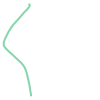

In [24]:
shapely.geometry.shape(streets["features"][0]["geometry"])

In [31]:
longitude, latitude = streets["features"][0]["geometry"]["coordinates"][0]
longitude, latitude

(-74.984581, 40.058246)

In [52]:
h3.geo_to_h3(latitude, longitude, 3)

'832a13fffffffff'

In [59]:
for longitude, latitude in streets["features"][0]["geometry"]["coordinates"]:
    print(h3.geo_to_h3(latitude, longitude, 15))

8e2a13404665837
8e2a1340466580f
8e2a13404665857
8e2a1340466585f
8e2a13404665a9f
8e2a13404665317
8e2a1340466538f
8e2a134046652d7
8e2a13404661167
8e2a134046612b7
8e2a1340466e937
8e2a1340466e8df
8e2a1340466e2af
8e2a1340466a977
8e2a1340466a95f
8e2a1340466a84f
8e2a1340466ab1f
8e2a1340466ab57
8e2a1340466aa67
8e2a134046686cf
8e2a1340466b80f
8e2a1340466bb2f
8e2a134046696e7
8e2a134009369a7
8e2a13400936827
8e2a13400936847
8e2a1340093684f
8e2a13400936a67
8e2a1340093002f
8e2a134009303af
8e2a134009314e7
8e2a134009314ef
8e2a1340093179f


In [86]:
new_geom = {"coordinates": [streets["features"][0]["geometry"]["coordinates"]], "type": "MultiPolygon"}
new_geom

{'coordinates': [[[-74.984581, 40.058246],
   [-74.984555, 40.058212],
   [-74.984553, 40.058188],
   [-74.984557, 40.058167],
   [-74.984637, 40.058062],
   [-74.984669, 40.058033],
   [-74.984712, 40.057992],
   [-74.984771, 40.057923],
   [-74.98491, 40.057764],
   [-74.985056, 40.057604],
   [-74.985107, 40.057535],
   [-74.985195, 40.057394],
   [-74.9853, 40.057182],
   [-74.985327, 40.057113],
   [-74.985339, 40.057063],
   [-74.985341, 40.05701],
   [-74.985333, 40.056972],
   [-74.985311, 40.056931],
   [-74.985274, 40.056887],
   [-74.985181, 40.056794],
   [-74.985067, 40.056692],
   [-74.984977, 40.056606],
   [-74.984838, 40.05648],
   [-74.984793, 40.056432],
   [-74.984744, 40.05637],
   [-74.984706, 40.056309],
   [-74.984691, 40.056282],
   [-74.984645, 40.056149],
   [-74.984579, 40.055867],
   [-74.984559, 40.05577],
   [-74.984521, 40.055525],
   [-74.984514, 40.055501],
   [-74.984513, 40.055439]]],
 'type': 'MultiPolygon'}

In [20]:
streets["features"][0]["properties"]

{'OBJECTID': 1,
 'FNODE': 12545,
 'TNODE': 23746,
 'LENGTH': 2781.74981192,
 'STCL2': 35640,
 'STCL2_ID': 5743,
 'PRE_DIR': None,
 'ST_NAME': 'STEVENSON',
 'ST_TYPE': 'ST',
 'SEG_ID': 880652,
 'ONEWAY': 'B',
 'CLASS': 5,
 'STNAME': 'STEVENSON ST',
 'CLASS1': 'Local Residential',
 'SPEEDLIM': '25',
 'RECSIGN': None,
 'SURFAWIDTH': 0,
 'RECFACIL': None,
 'PARKING': 'Z',
 'BIKENETWOR': None,
 'LENGTH_MIL': 0.21746331,
 'PHASE2_SID': None,
 'SIDEWALK_I': 0,
 'COMBINED_S': 'Local (Catch All)',
 'STREET_TYP': 'Local (Catch All)',
 'SIDEWLK_WD': 'Greater than or equal to 10 feet',
 'WLK_ZN': 'Greater than or equal to 5 feet',
 'Shape__Length': 458.056118811198}

# Shapefile (Fiona), H3, and Shapely

In [60]:
import fiona
import h3
import shapely

In [115]:
src = fiona.open("../data/extract/tl_2023_42_tabblock20/tl_2023_42_tabblock20.shp") 

In [114]:
print(src.schema)

{'properties': {'STATEFP20': 'str:2', 'COUNTYFP20': 'str:3', 'TRACTCE20': 'str:6', 'BLOCKCE20': 'str:4', 'GEOID20': 'str:15', 'GEOIDFQ20': 'str:24', 'NAME20': 'str:10', 'MTFCC20': 'str:5', 'UR20': 'str:5', 'UACE20': 'str:5', 'FUNCSTAT20': 'str:1', 'ALAND20': 'int:14', 'AWATER20': 'int:14', 'INTPTLAT20': 'str:11', 'INTPTLON20': 'str:12', 'HOUSING20': 'int:12', 'POP20': 'int:12'}, 'geometry': 'Polygon'}


In [64]:
print(src.crs)

EPSG:4269


In [112]:
dict(src[0].properties)

{'STATEFP20': '42',
 'COUNTYFP20': '041',
 'TRACTCE20': '012600',
 'BLOCKCE20': '1031',
 'GEOID20': '420410126001031',
 'GEOIDFQ20': '1010000US420410126001031',
 'NAME20': 'Block1031',
 'MTFCC20': 'G5040',
 'UR20': 'R',
 'UACE20': None,
 'FUNCSTAT20': 'S',
 'ALAND20': 0,
 'AWATER20': 1680,
 'INTPTLAT20': '+40.1236816',
 'INTPTLON20': '-077.1798069',
 'HOUSING20': 0,
 'POP20': 0}

In [79]:
src[0].geometry.coordinates

[[(-77.180082, 40.123845),
  (-77.179991, 40.123866),
  (-77.179924, 40.123864),
  (-77.179711, 40.12388),
  (-77.179623, 40.12387),
  (-77.179585, 40.123861),
  (-77.179555, 40.123845),
  (-77.17954, 40.123813),
  (-77.179536, 40.123767),
  (-77.179561, 40.123695),
  (-77.179598, 40.123638),
  (-77.179627, 40.123595),
  (-77.179729, 40.123459),
  (-77.179761, 40.123425),
  (-77.179803, 40.123401),
  (-77.179874, 40.123376),
  (-77.180105, 40.123844),
  (-77.180082, 40.123845)]]

In [70]:
geom = src[0].geometry

In [104]:
geom.type

'Polygon'

In [73]:
geom.coordinates[0]

[(-77.180082, 40.123845),
 (-77.179991, 40.123866),
 (-77.179924, 40.123864),
 (-77.179711, 40.12388),
 (-77.179623, 40.12387),
 (-77.179585, 40.123861),
 (-77.179555, 40.123845),
 (-77.17954, 40.123813),
 (-77.179536, 40.123767),
 (-77.179561, 40.123695),
 (-77.179598, 40.123638),
 (-77.179627, 40.123595),
 (-77.179729, 40.123459),
 (-77.179761, 40.123425),
 (-77.179803, 40.123401),
 (-77.179874, 40.123376),
 (-77.180105, 40.123844),
 (-77.180082, 40.123845)]

In [100]:
polygon = {
    "type": "Polygon",    
    "coordinates": [
        [
            [37.813318999983238, -122.4089866999972145],
            [37.7198061999978478, -122.3544736999993603],
            [37.8151571999998453, -122.4798767000009008],
            [37.813318999983238, -122.4089866999972145],
        ]
    ]
}

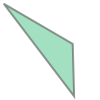

In [101]:
shapely.geometry.shape(polygon)

In [102]:
h3.polyfill(polygon, 7)

{'872830820ffffff',
 '872830828ffffff',
 '87283082affffff',
 '87283082bffffff',
 '87283082effffff',
 '872830870ffffff',
 '872830876ffffff'}

In [106]:
dict(geom)

{'coordinates': [[(-77.180082, 40.123845),
   (-77.179991, 40.123866),
   (-77.179924, 40.123864),
   (-77.179711, 40.12388),
   (-77.179623, 40.12387),
   (-77.179585, 40.123861),
   (-77.179555, 40.123845),
   (-77.17954, 40.123813),
   (-77.179536, 40.123767),
   (-77.179561, 40.123695),
   (-77.179598, 40.123638),
   (-77.179627, 40.123595),
   (-77.179729, 40.123459),
   (-77.179761, 40.123425),
   (-77.179803, 40.123401),
   (-77.179874, 40.123376),
   (-77.180105, 40.123844),
   (-77.180082, 40.123845)]],
 'type': 'Polygon',
 'geometries': None}

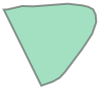

In [108]:
shapely.geometry.shape(dict(geom))

In [107]:
h3.polyfill(dict(geom), 15)

{'8ff046658940400',
 '8ff046658940402',
 '8ff046658940403',
 '8ff046658940404',
 '8ff046658940406',
 '8ff04665894040a',
 '8ff04665894040e',
 '8ff046658940410',
 '8ff046658940411',
 '8ff046658940412',
 '8ff046658940413',
 '8ff046658940414',
 '8ff046658940415',
 '8ff046658940416',
 '8ff046658940418',
 '8ff046658940419',
 '8ff04665894041a',
 '8ff04665894041b',
 '8ff04665894041c',
 '8ff04665894041d',
 '8ff04665894041e',
 '8ff046658940430',
 '8ff046658940431',
 '8ff046658940432',
 '8ff046658940433',
 '8ff046658940434',
 '8ff046658940435',
 '8ff046658940436',
 '8ff046658940480',
 '8ff046658940481',
 '8ff046658940482',
 '8ff046658940483',
 '8ff046658940484',
 '8ff046658940485',
 '8ff046658940486',
 '8ff046658940488',
 '8ff046658940489',
 '8ff04665894048a',
 '8ff04665894048b',
 '8ff04665894048c',
 '8ff04665894048d',
 '8ff04665894048e',
 '8ff046658940490',
 '8ff046658940491',
 '8ff046658940493',
 '8ff046658940494',
 '8ff046658940495',
 '8ff046658940498',
 '8ff046658940499',
 '8ff04665894049a',


In [116]:
src.close()

# Research Object Creation

Attributes we care about

- Authorship
- Timestamps
- File(s)
  - Name
  - Format
- Upstream dependencies
- Workflow/processes

Dataset Descriptions

Use attributes and entities as needed

- Attributes
    - name
    - publisher {"@id": "#local_id"} or {"@id": "url"}
    - creater {"@id": "#person"}
    - license
    - datePublished
    - keywords (ex. "streets, aggregated features, map")
    - mainEntity Output Dataset 
- Data Entities
    - File
        - source (File(s))
        - description
        - contentSize (MB, KB, or B)
        - encodingFormat (from PRONOM: https://www.nationalarchives.gov.uk/PRONOM)
        - sha256
    - Dataset
        - source (File(s))
        - description
        - contentSize (MB, KB, or B)
        - encodingFormat (from PRONOM: https://www.nationalarchives.gov.uk/PRONOM)
    - ComputationalWorkflow
        - @type (pre-defined with built-in models) ["File", "SoftwareSourceCode", "ComputationalWorkflow"]
        - source (File)
        - author
        - programmingLanguage
        - input [{"@id": "#id1"}, {"@id": "#id2"}]
        - output [{"@id": "#id3"}]
- Contextual Entities
    - Publisher
        - @type Organization
        - name
        - url
    - Person
        - name
    - programmingLanguage
        - @type ["ComputerLanguage", "SoftwareApplication"]
        - name
        - version
        - url
    - encodingFormat
        - @id PRONOM url
        - @type Website
        - name
    - input
        - @type FormalParameter
        - name
        - defaultValue {"@id": "#ReferenceToUpstreamDataset"}
        - encodingFormat
        - valueRequired True
    - output
        - @type FormalParameter
        - name
        - defaultValue {"@id": "#ReferenceToDownstreamDataset"}
        - encodingFormat
        - valueRequired True

In [192]:
from rocrate.rocrate import ROCrate
from rocrate.model import (
    Person,
    File,
    Dataset,
    ComputationalWorkflow,
    ContextEntity,
)

Dataset
    source=source,
    dest_path=dest_path,
    fetch_remote=fetch_remote,
    validate_url=validate_url,
    properties=properties

properties?



In [197]:
from pip._internal.operations import freeze

In [199]:
pkgs = list(freeze.freeze())
[pkg for pkg in pkgs if "polars" in pkg]

['polars==0.20.15']

In [200]:
e = ContextEntity(
    crate,
    identifier="polars",
    properties={
        "@type": ["ComputerLanguage", "SoftwareApplication"],
        "name": "Polars 0.20.15",
        "version": "0.20.15",
        "url": "https://pypi.org/project/polars/0.20.15/",
    },
)

In [191]:
w = ComputationalWorkflow(
    crate,
    source="tmp/polars_transformation.json",
    properties={
        "author": {"@id": "#AA"},
        "programmingLanguage": {"@id": "#polars"},
    }
)

In [179]:
d = Dataset(
    crate,
    source="../data/extract/OpenDataPhillyCompleteStreets.geojson",
    properties={
        "description": "Data of centerlines of philly streets lines",
        "contentSize": "120",
        "encodingFormat": ["application/geo+json", {"@id": "https://www.nationalarchives.gov.uk/PRONOM/fmt/1367"}],
    }
)

In [203]:
f1 = File(
    crate,
    source="../data/extract/tl_2023_42_tabblock20/tl_2023_42_tabblock20.shp",
    properties={
        "description": "Shapefile for TIGER 20 Blocks in Philadelphia County, Pennsylvania",
        "contentSize": "352MB",
        "encodingFormat": "some URL",
        "sha256": "Will Format Later",
    }
)

In [204]:
d = Dataset(
    crate,    
    source="../data/extract/tl_2023_42_tabblock20",
    properties={
        "description": "Shapes and names of census blocks",
        "hasParts": [
            {"@id": "#tl_2023_42_tabblock20.shp"},
        ]
    }
)

In [183]:
new_crate = crate.add(
    d
)

In [184]:
new_crate

<OpenDataPhillyCompleteStreets.geojson/ Dataset>

In [180]:
d.properties()

{'@id': 'OpenDataPhillyCompleteStreets.geojson/',
 '@type': 'Dataset',
 'description': 'Data of centerlines of philly streets lines',
 'contentSize': '120',
 'encodingFormat': ['application/geo+json',
  {'@id': 'https://www.nationalarchives.gov.uk/PRONOM/fmt/1367'}]}

In [181]:
crate.data_entities

[]

Crate properties:

- name
- datePublished
- creator
- license
- description
- keywords
- publisher
- isBasedOn
- mainEntity

Crate functions:

- add_file
- add_dataset
- add

In [148]:
import datetime as dt

In [122]:
crate = ROCrate()

In [164]:
# Time
timestamp = dt.datetime.now()

In [165]:
crate.datePublished = timestamp

In [166]:
crate.datePublished

datetime.datetime(2024, 3, 17, 14, 33, 44, 898337)

In [167]:
crate.contextual_entities

[<#389ed440-7216-4a11-9af0-d077fe42abdd Person>, <#AA Person>]

In [168]:
crate.data_entities

[]

In [153]:
dt.datetime.now().isoformat()

'2024-03-17T14:30:28.083229'

In [131]:
alice_info = {
    "id": "AA",
    "name": "Alice Doe",
}

In [132]:
alice = crate.add(
    Person(
        crate,
        alice_info["id"],
        properties={"name": alice_info["name"]},
    )
)

In [126]:
crate.write("../metastore/test_crate/")

In [142]:
for e in crate.get_entities():
    print(e.id, e.type)

./ Dataset
ro-crate-metadata.json CreativeWork
#389ed440-7216-4a11-9af0-d077fe42abdd Person
#AA Person


In [143]:
crate.get_by_type(alice)

[]

In [144]:
alice

<#AA Person>